## Exercise

Find the best K for KNN model with cancer_data.csv.  
Use decision tree classifier on cancer_data.csv, compare the accuracy with KNN, which one is better?  

> Use features with _mean in it, 20% data test and random state 2020

Kirim ke Brigita.gems@gmail.com  
subject: Latihan Classification

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
# import statsmodels.api as sm 
# from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [2]:
# Load dataset
cancer = pd.read_csv('cancer_data.csv')
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# mengubah data target menjadi angka agar bisa dimodelkan
cancer['diagnosis'] = [1 if i=='M' else 0 for i in cancer['diagnosis']]

In [4]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# cek apakah ada null value
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# tentukan feature dan target
X = cancer[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']]

y = cancer['diagnosis']

In [7]:
# melihat perbandingan jumlah target
y.value_counts()

# 0= benign
# 1= melignant
# perbandingan benign:melignant sekitar 7:4

0    357
1    212
Name: diagnosis, dtype: int64

In [8]:
# Splitting data 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    stratify = y,
    test_size = 0.2,
    random_state = 2020
)

# model yg baik adalah ketika random state-nya diubah2, akurasinya ga terlalu jauh berubah 

In [9]:
# Normalisasi data 
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN

In [10]:
# Mencari nilai k terbaik
# Gunakan X yg sudah discaling/dinormalize untuk KNN

k = range(1,30,2) # 30 adalah kira2 akar dari jumlah data (569)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)

    y_predict_train = knn.predict(X_train_scaled)
    training_accuracies.append(accuracy_score(y_train, y_predict_train))

    y_predict_test = knn.predict(X_test_scaled)
    acc_score = accuracy_score(y_test, y_predict_test)
    testing_accuracies.append(accuracy_score(y_test, y_predict_test))

    if score < acc_score:
        score = acc_score
        best_k = i

In [11]:
print('n_neighbors terbaik:', best_k)
print('accuration score pada best_k:', score)

n_neighbors terbaik: 3
accuration score pada best_k: 0.956140350877193


<function matplotlib.pyplot.show(*args, **kw)>

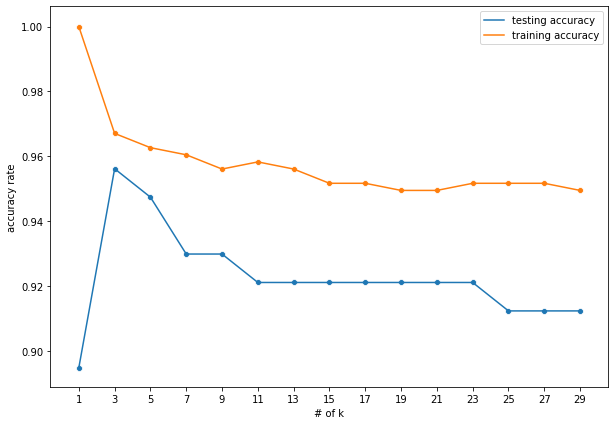

In [12]:
# buat line chart untuk mencari akurasi maksimum di k berapa 

plt.figure(figsize=(10,7))
sns.lineplot(k, testing_accuracies)
sns.scatterplot(k, testing_accuracies)
sns.lineplot(k, training_accuracies)
sns.scatterplot(k, training_accuracies)
plt.legend(['testing accuracy', 'training accuracy'])
plt.xlabel('# of k')
plt.ylabel('accuracy rate')
plt.xticks(list(k))
plt.show

### kalau dilihat dari grafik di atas, datanya overfitting karena training accuracy selalu lebih tinggi dari test accuracy

In [13]:
# Menggunakan KNN dgn k=3

# fitting data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# membuat variable berisi hasil prediksi dari model yg telah kita train 
y_predict_class = knn.predict(X_test_scaled)

In [14]:
# cek akurasi antara prediksi dari model dan y_test
print('akurasi KNN Normalized best-k:',accuracy_score(y_predict_class, y_test))

akurasi KNN Normalized best-k: 0.956140350877193


# Decision Tree

In [18]:
# Membuat model Decision Tree

tree = DecisionTreeClassifier(
    criterion='gini',
    # max_depth=2       # max_depth untuk menentukan jumlah level
)

# fitting data
tree.fit(X_train_scaled,y_train)
y_predict_class = tree.predict(X_test_scaled)

In [19]:
# cek akurasi Decision Tree
print('akurasi Decision Tree:', accuracy_score(y_test, y_predict_class))

akurasi Decision Tree: 0.9385964912280702


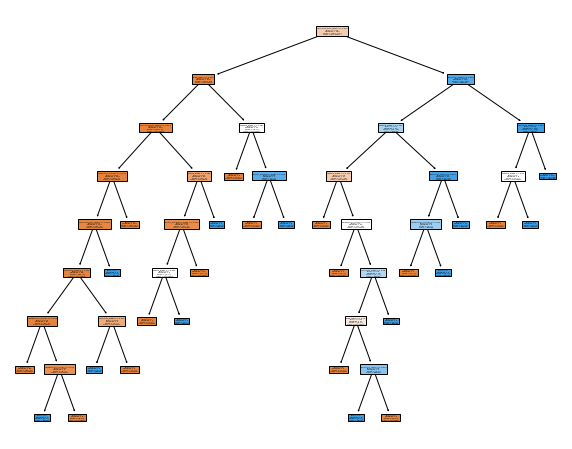

In [20]:
# plot tree
plt.figure(figsize=(10,8))
plot_tree(
    tree,
    feature_names=list(X), 
    class_names=['Melignant','Benign'], 
    filled=True
)
plt.show()

## Model mana yang akurasinya lebih baik?

- akurasi KNN Normalized best-k : 0.956140350877193
- akurasi Decision Tree         : 0.8596491228070176

Jadi, untuk dataset cancer, akurasi KNN lebih baik daripada Decision Tree 
